# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

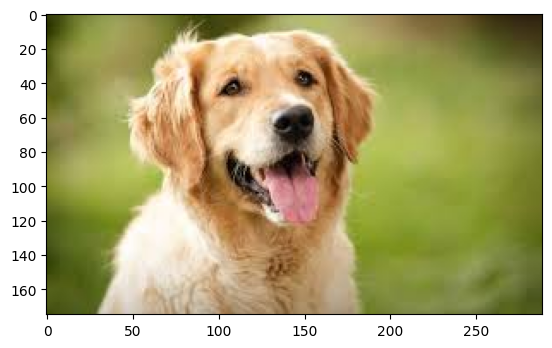

In [14]:
img_rgb = cv2.imread("/content/dog image.jpeg")
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

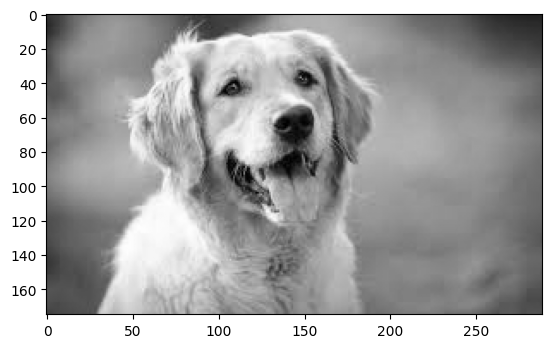

In [20]:
R, G, B = img_rgb[..., 0], img_rgb[..., 1], img_rgb[..., 2]
img_gray_np = 0.299 * R + 0.587 * G + 0.114 * B
img_gray_np = img_gray_np.astype(np.uint8)

plt.imshow(img_gray_np,cmap='gray')
plt.show()

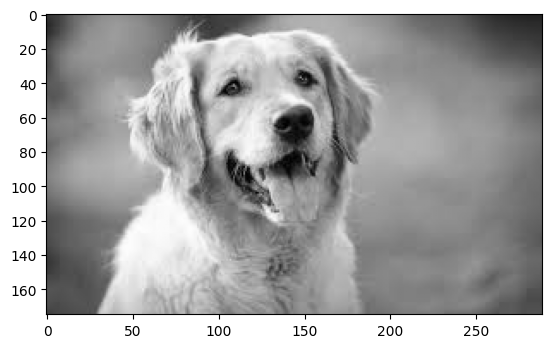

In [21]:
img_gray_cv2 = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray_cv2, cmap='gray')

In [22]:
print("\nPixel Value Comparison (Top-Left):")
print(f"NumPy Grayscale Pixel [0, 0]: {img_gray_np[0, 0]}")
print(f"cv2 Grayscale Pixel [0, 0]: {img_gray_cv2[0, 0]}")


Pixel Value Comparison (Top-Left):
NumPy Grayscale Pixel [0, 0]: 55
cv2 Grayscale Pixel [0, 0]: 55


In [23]:
print("\nArray Shapes:")
print(f"RGB Image Shape: {img_rgb.shape}")
print(f"NumPy Grayscale Image Shape: {img_gray_np.shape}")
print(f"cv2 Grayscale Image Shape: {img_gray_cv2.shape}")


Array Shapes:
RGB Image Shape: (175, 289, 3)
NumPy Grayscale Image Shape: (175, 289)
cv2 Grayscale Image Shape: (175, 289)


In [24]:
print("\nSample Pixel Values (at [10, 10]):")
print(f"RGB Pixel: {img_rgb[10, 10]}") # (R, G, B) values
print(f"NumPy Grayscale Pixel: {img_gray_np[10, 10]}") # Single intensity value
print(f"cv2 Grayscale Pixel: {img_gray_cv2[10, 10]}") # Single intensity value


Sample Pixel Values (at [10, 10]):
RGB Pixel: [85 97 23]
NumPy Grayscale Pixel: 84
cv2 Grayscale Pixel: 85


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [25]:
# Convert image to float32 for FFT calculation
img_float = img_gray_np.astype(np.float32)
f = np.fft.fft2(img_float)
fshift = np.fft.fftshift(f)

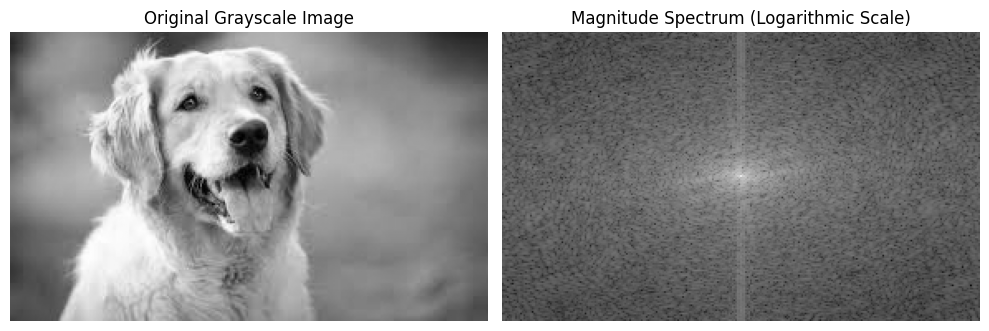

In [26]:
# Compute Magnitude
magnitude_spectrum = np.abs(fshift)

# Phase (in radians)
phase_spectrum = np.angle(fshift)
magnitude_spectrum_log = 20 * np.log(magnitude_spectrum)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray_np, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.title('Magnitude Spectrum (Logarithmic Scale)')
plt.axis('off')

plt.tight_layout()
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

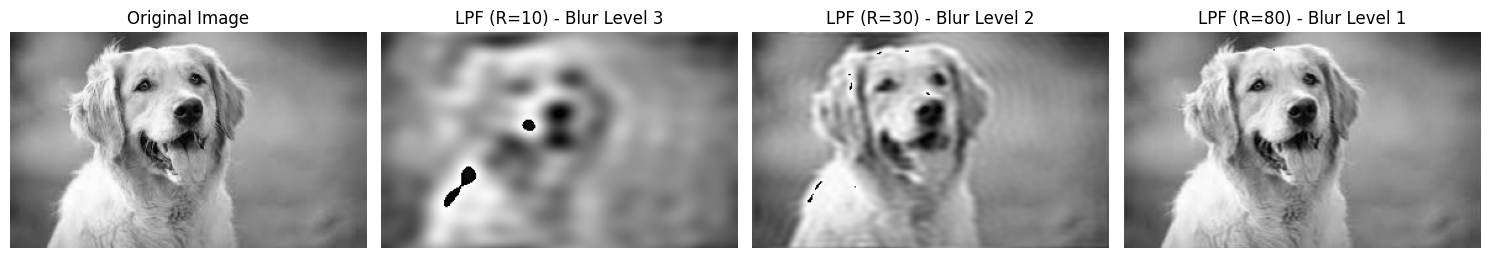

In [29]:
# Get image dimensions
rows, cols = img_gray_np.shape
crow, ccol = rows // 2, cols // 2  # Center coordinates

# Radii
# You can change these radii based on your image size for best visual results.
radii = [10, 30, 80]

plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_gray_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, R in enumerate(radii):
    mask = np.zeros((rows, cols), dtype=np.uint8)
    y, x = np.ogrid[-crow:rows - crow, -ccol:cols - ccol]
    mask_area = x**2 + y**2 <= R**2
    mask[mask_area] = 1

    fshift_lpf = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_lpf)
    img_back = np.fft.ifft2(f_ishift)

    img_lpf = np.abs(img_back).astype(np.uint8)

    plt.subplot(1, 4, i + 2)
    plt.imshow(img_lpf, cmap='gray')
    plt.title(f'LPF (R={R}) - Blur Level {3-i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

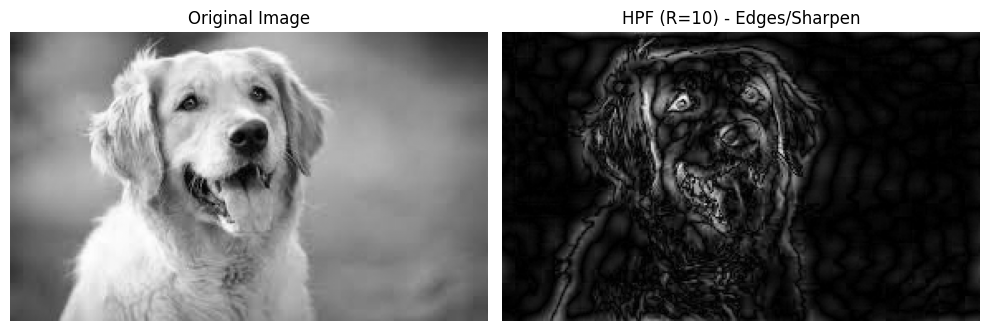

In [31]:
R_hpf = 10 # Example radius for HPF

mask_lpf_hpf = np.zeros((rows, cols), dtype=np.uint8)
y, x = np.ogrid[-crow:rows - crow, -ccol:cols - ccol]
mask_area_lpf = x**2 + y**2 <= R_hpf**2
mask_lpf_hpf[mask_area_lpf] = 1
mask_hpf = 1 - mask_lpf_hpf

fshift_hpf = fshift * mask_hpf
f_ishift_hpf = np.fft.ifftshift(fshift_hpf)
img_back_hpf = np.fft.ifft2(f_ishift_hpf)
img_hpf = np.abs(img_back_hpf).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_hpf, cmap='gray')
plt.title(f'HPF (R={R_hpf}) - Edges/Sharpen')
plt.axis('off')

plt.tight_layout()
plt.show()

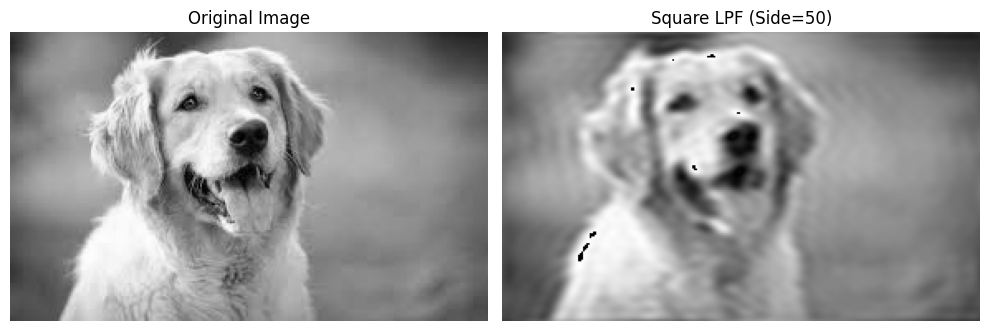

In [32]:
side = 50
half_side = side // 2

mask_sq = np.zeros((rows, cols), dtype=np.uint8)
row_start = crow - half_side
row_end = crow + half_side
col_start = ccol - half_side
col_end = ccol + half_side

mask_sq[row_start:row_end, col_start:col_end] = 1
fshift_sq_lpf = fshift * mask_sq

f_ishift_sq = np.fft.ifftshift(fshift_sq_lpf)
img_back_sq = np.fft.ifft2(f_ishift_sq)
img_sq_lpf = np.abs(img_back_sq).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_sq_lpf, cmap='gray')
plt.title(f'Square LPF (Side={side})')
plt.axis('off')

plt.tight_layout()
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

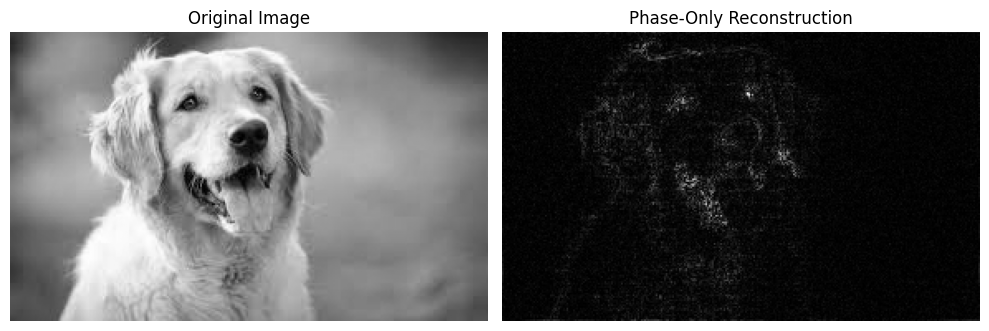

In [33]:

phase_only_spectrum = fshift / np.abs(fshift)
f_ishift_po = np.fft.ifftshift(phase_only_spectrum)
img_back_po = np.fft.ifft2(f_ishift_po)
img_phase_only = np.abs(img_back_po)

# Normalize for display
img_phase_only = (img_phase_only - img_phase_only.min()) / (img_phase_only.max() - img_phase_only.min())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_phase_only, cmap='gray')
plt.title('Phase-Only Reconstruction')
plt.axis('off')

plt.tight_layout()
plt.show()

# # Reconstruction from `np.angle(fshift)` results in a meaningless/noisy image
# # because the IFFT operation requires a complex spectrum ($|F|e^{j\Phi}$), but
# # `np.angle(fshift)` is just a real array of phase values, not the complex components.
# # This is mathematically incorrect for image reconstruction.

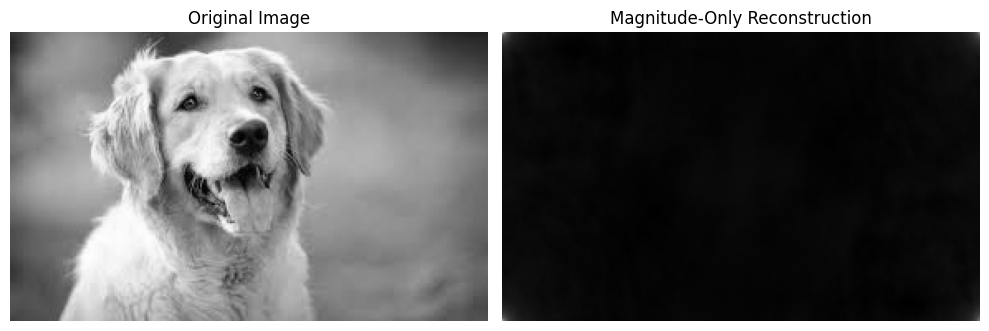

In [34]:

magnitude_only_spectrum = np.abs(fshift)

f_ishift_mo = np.fft.ifftshift(magnitude_only_spectrum)
img_back_mo = np.fft.ifft2(f_ishift_mo)
img_mag_only = np.abs(img_back_mo)
# Normalize for display
img_mag_only = (img_mag_only - img_mag_only.min()) / (img_mag_only.max() - img_mag_only.min())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_mag_only, cmap='gray')
plt.title('Magnitude-Only Reconstruction')
plt.axis('off')

plt.tight_layout()
plt.show()

# # Difference in display: The image reconstructed in D2 looks different from the
# # Magnitude Spectrum plot in B2 because:
# # 1. B2 is the *logarithm* of the magnitude spectrum (still in the frequency domain).
# # 2. D2 is the *Inverse Fourier Transform* of the magnitude spectrum (now in the spatial domain),
# #    and the result has not been log-scaled for display. The magnitude-only
# #    reconstruction lacks phase information, resulting in an image that looks like
# #    a blob of texture without distinct structures or features.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

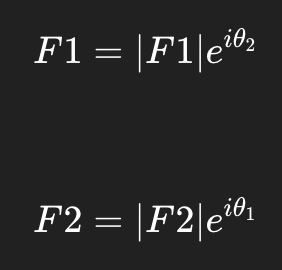

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

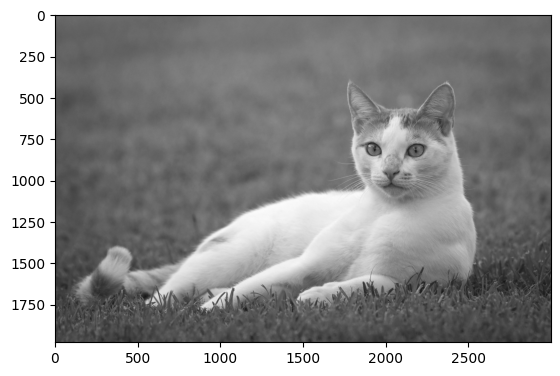

In [52]:
img2_rgb = cv2.imread("/content/cat_image.jpeg", cv2.IMREAD_COLOR)
img2_rgb = cv2.cvtColor(img2_rgb, cv2.COLOR_BGR2RGB)
img3_gray = cv2.cvtColor(img2_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img3_gray, cmap='gray')
plt.show()

In [53]:
img3_gray = cv2.resize(img3_gray, (cols, rows), interpolation=cv2.INTER_LINEAR) # Using a resized version of the first for demonstration

f1_shift = np.fft.fftshift(np.fft.fft2(img_gray_np.astype(np.float32)))
mag1 = np.abs(f1_shift)
phase1 = np.angle(f1_shift)
f2_shift = np.fft.fftshift(np.fft.fft2(img3_gray.astype(np.float32)))
mag2 = np.abs(f2_shift)
phase2 = np.angle(f2_shift)

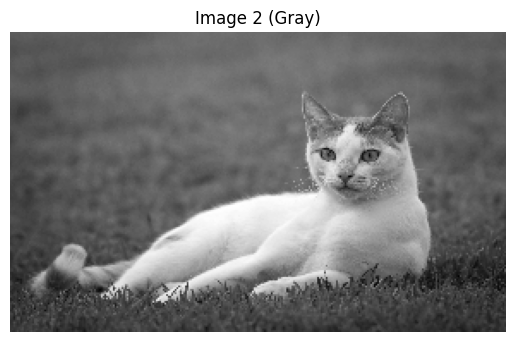

In [54]:
plt.imshow(img3_gray, cmap='gray')
plt.title('Image 2 (Gray)')
plt.axis('off')
plt.show()

In [55]:
# Combine magnitude of image 1 with phase of image 2
# F_A = |F1| * e^(j * phase2)
complex_a = mag1 * np.exp(1j * phase2)

# Combine magnitude of 2 with phase of 1
# F_B = |F2| * e^(j * phase1)
complex_b = mag2 * np.exp(1j * phase1)

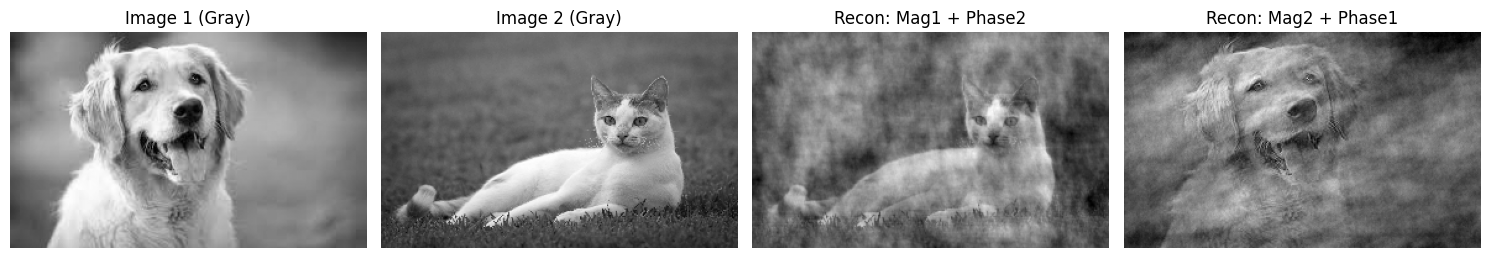

In [56]:
def reconstruct_image(complex_spectrum):
    f_ishift = np.fft.ifftshift(complex_spectrum)
    img_back = np.fft.ifft2(f_ishift)
    img_reconstructed = np.abs(img_back)
    # Normalize for display
    img_reconstructed = (img_reconstructed - img_reconstructed.min()) / (img_reconstructed.max() - img_reconstructed.min()) * 255
    return img_reconstructed.astype(np.uint8)

img_a = reconstruct_image(complex_a) # Mag1 + Phase2
img_b = reconstruct_image(complex_b) # Mag2 + Phase1

plt.figure(figsize=(15, 7))
plt.subplot(1, 4, 1)
plt.imshow(img_gray_np, cmap='gray')
plt.title('Image 1 (Gray)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img3_gray, cmap='gray')
plt.title('Image 2 (Gray)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_a, cmap='gray')
plt.title('Recon: Mag1 + Phase2')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_b, cmap='gray')
plt.title('Recon: Mag2 + Phase1')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# # The image reconstructed from Mag2 + Phase1 (img_b) has the structural features
# # of Image 1, but the texture, contrast, and energy of Image 2.
# #
# # This demonstrates that the **Phase Spectrum** contains the dominant information
# # about the **object's structure and location**, while the **Magnitude Spectrum** # # contains the dominant information about the **texture, energy, and overall appearance**.